# Lists

In [4]:
import sys
from pathlib import Path

current = Path.cwd()
for parent in [current, *current.parents]:
    if (parent / '_config.yml').exists():
        project_root = parent  # ← Add project root, not chapters
        break
else:
    project_root = Path.cwd().parent.parent

sys.path.insert(0, str(project_root))

from shared import thinkpython, diagram, jupyturtle, download

This chapter presents one of Python's most useful built-in types, lists.
You will also learn more about objects and what can happen when multiple variables refer to the same object.

## Learning Objectives

By the end of this chapter, you should be able to:

- Construct and manipulate Python lists using indexing, slicing (including advanced step slices), and core list methods.

- Explain and reason about object identity, aliasing, shallow vs. deep copies, and how lists behave when passed to functions.

- Use lists idiomatically in Python: list comprehensions, unpacking and starred expressions, `enumerate()`, `zip()`, and basic sorting/looping patterns.

## Introduction to Lists

### What is a List?

If you're familiar with other programming languages, Python lists are similar to arrays in languages like Java, C++, or JavaScript. However, Python lists are more flexible: they can grow or shrink dynamically and can contain mixed data types.

A Python **list** is a sequence data type, like strings and tuples. Sequences are: 
- ordered collections that support 
- indexing, 
- slicing, 
- `len()`, `in` membership testing, and 
- iteration. 

The key distinction is mutability and heterogeneous element data types: 
- In a string, the values are characters; in a list, they can be **any type**. The value literals in a list are called **elements**.
- Lists are mutable, meaning they can be modified after creation. 


The following figure shows the state diagram for `cheeses`, `numbers` and `empty`. **Lists are objects** in Python's memory. When you create a list, Python creates a **list object** that holds your data in a specific order, and the variable holds a **reference** to that object.


In [9]:
numbers = [42, 123]
fruits = ['apple', 'banana', 'cherry']
empty = []
from diagram import make_list, Binding, Value

list1 = make_list(fruits, dy=-0.3, offsetx=0.17)
binding1 = Binding(Value('fruits'), list1)

list2 = make_list(numbers, dy=-0.3, offsetx=0.17)
binding2 = Binding(Value('numbers'), list2)

list3 = make_list(empty, dy=-0.3, offsetx=0.1)
binding3 = Binding(Value('empty'), list3)

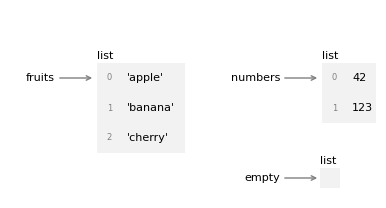

In [10]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [3.66, 1.88, 0.45, 1.2]
ax = diagram(width, height)
bbox1 = binding1.draw(ax, x, y)
bbox2 = binding2.draw(ax, x+2.25, y)
bbox3 = binding3.draw(ax, x+2.25, y-1.0)

bbox = Bbox.union([bbox1, bbox2, bbox3])
#adjust(x, y, bbox)

## Creating Lists

There are several ways to create a new list:

- **Square brackets `[]`**: Enclose elements in square brackets to create a list literal
- **List comprehension**: Create lists using a concise expression-based syntax
- **`list()` constructor**: Convert any iterable (strings, ranges, tuples, etc.) into a list
- **`split()` method**: Convert a string into a list of words or parts
- **Nested lists**: Create lists containing other lists as elements

### Basic List Creation

The most common way to create a list is by enclosing comma-separated values in square brackets `[]`.

**Syntax:**
```python
list_name = [element1, element2, element3, ...]
```

The elements can be of any type, and you can mix different types in the same list.

In [15]:
### Using square brackets - sequences of items

numbers = [1, 2, 3, 4, 5]               ### a list of integers
fruits = ['apple', 'banana', 'cherry']  ### a list of strings
empty = []                              ### an empty list

print(fruits)
print(numbers)
print(empty)

['apple', 'banana', 'cherry']
[1, 2, 3, 4, 5]
[]


In [ ]:
### EXERCISE: Create Different Types of Lists
# Create the following lists:
# 1. A list called 'colors' with three color names
# 2. An empty list called 'empty_list'
# 3. A list called 'mixed' with a string, an integer, and a float
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
colors = ['red', 'blue', 'green']
empty_list = []
mixed = ['hello', 42, 3.14]

print(f"Colors: {colors}")
print(f"Empty list: {empty_list}")
print(f"Mixed list: {mixed}")

### `list()` Constructor

The `list()` constructor converts any iterable (strings, ranges, tuples, etc.) into a list. This is useful when you need to convert data from one sequence type to another.

In [17]:
chars = list('spam')            ### a list of characters
nums = list(range(5))           ### a list of numbers from 0 to 4
tuple_data = (1, 2, 3)
list_data = list(tuple_data)    ### a list created from a tuple

print(chars)
print(nums)
print(list_data)

['s', 'p', 'a', 'm']
[0, 1, 2, 3, 4]
[1, 2, 3]


In [ ]:
### EXERCISE: Convert Using list() Constructor
# 1. Convert the string "Python" into a list of characters
# 2. Create a list of numbers from 10 to 14 using range() and list()
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
chars = list('Python')
numbers = list(range(10, 15))

print(f"Characters: {chars}")
print(f"Numbers: {numbers}")

### List Comprehension

**List comprehension** provides a concise way to create lists based on existing sequences or ranges. It's a powerful and Pythonic approach that often replaces traditional loops. They're a more Pythonic alternative to using `for` loops to build lists.

**Basic Syntax:**
```python
[expression for item in iterable]
```

**With Condition:**
```python
[expression for item in iterable if condition]
```

In [6]:
# Traditional way
squares = []
for x in range(5):
    squares.append(x**2)
print("Traditional:", squares)

# List comprehension way
squares = [x**2 for x in range(5)]
print("Comprehension:", squares)

# With condition
even_squares = [x**2 for x in range(10) if x % 2 == 0]
print("Even squares:", even_squares)

Traditional: [0, 1, 4, 9, 16]
Comprehension: [0, 1, 4, 9, 16]
Even squares: [0, 4, 16, 36, 64]


In [8]:
# More complex list comprehensions
words = ['hello', 'world', 'python', 'programming']

# Get lengths of words
lengths = [len(word) for word in words]
print("Word lengths:", lengths)

# Get uppercase words longer than 5 characters
long_words = [word.upper() for word in words if len(word) > 5]
print("Long words:", long_words)

# Nested comprehension - flatten a 2D list
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
flattened = [item for row in matrix for item in row]
print("Flattened:", flattened)

Word lengths: [5, 5, 6, 11]
Long words: ['PYTHON', 'PROGRAMMING']
Flattened: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
### EXERCISE: convert string to uppercase using list comprehension
### Hint: use str.upper() method
### Your code starts here:



### Your code ends here.

In [10]:
# Convert strings to uppercase
words = ['hello', 'world', 'python']
uppercase_words = [word.upper() for word in words]
print(uppercase_words)

['HELLO', 'WORLD', 'PYTHON']


In [11]:
### EXERCISE: Filter list using list comprehension: 
### Create a new list with only words longer than 5 characters 
### Hint: use len() function
### Your code starts here:
words = ['apple', 'banana', 'cherry', 'date', 'elderberry']



### Your code ends here.

In [23]:
words = ['apple', 'banana', 'cherry', 'date', 'elderberry']
long_words = [word for word in words if len(word) > 5]
print(long_words)

['banana', 'cherry', 'elderberry']


In [ ]:
### EXERCISE: List Comprehension Practice
# 1. Create a list of cubes (x^3) for numbers 1 through 5
# 2. Create a list of only odd numbers from 1 to 20
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
cubes = [x**3 for x in range(1, 6)]
odds = [x for x in range(1, 21) if x % 2 != 0]

print(f"Cubes: {cubes}")
print(f"Odd numbers: {odds}")

### Using `split()` Method

The `split()` method converts a string into a list of words (or parts based on a delimiter).

In [24]:
# Split by whitespace (default)
words = 'hello world python'.split()
print(words)

# Split by custom delimiter
data = 'apple,banana,cherry'.split(',')
print(data)

['hello', 'world', 'python']
['apple', 'banana', 'cherry']


In [ ]:
### EXERCISE: Using split() Method
# 1. Split the sentence "Python is an amazing language" into a list of words
# 2. Split the string "2026-02-16" by the delimiter "-"
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
sentence = "Python is an amazing language"
words = sentence.split()

date_string = "2026-02-16"
date_parts = date_string.split("-")

print(f"Words: {words}")
print(f"Date parts: {date_parts}")

### Nested Lists

- Although a list can contain another list, the nested list still counts as a single element.
- The elements of a list don't have to be the same data type. 

The following lists contain a string, a float, an integer, and another list (**nested**). We see that the length of the list `mixed_list` is 4, although it looks having more than 4 elements, but the 4th element is a list and counted only as 1 element.

In [25]:
numbers = [1, 2, 3, 4, 5]
mixed_list = ['spam', 2.0, 5, numbers ]

print(mixed_list)
print(f"There are {len(mixed_list)} elements in the mixed list.")

['spam', 2.0, 5, [1, 2, 3, 4, 5]]
There are 4 elements in the mixed list.


In [ ]:
### EXERCISE: Working with Nested Lists
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# 1. Access the second row (index 1)
# 2. Access the element in the first row, third column (value should be 3)
# 3. Calculate the total number of elements (not rows) using len()
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
second_row = matrix[1]
element_1_3 = matrix[0][2]
total_elements = len(matrix) * len(matrix[0])  # rows * cols

print(f"Second row: {second_row}")
print(f"Element at [0][2]: {element_1_3}")
print(f"Total elements: {total_elements}")

## Accessing List Elements

Now that we know how to create lists, let's learn how to access and extract data from them. Python provides several ways to retrieve elements from a list.

- Understanding List Indices
  Lists in Python use **zero-based indexing**, meaning the first element is at position `0`, the second at position `1`, and so on. You can think of the index as the offset from the beginning of the list.
- List Index Properties
  List indices work the same way as string indices:
    -   Any integer expression can be used as an index.
    -   If you try to read or write an element that does not exist, you get an `IndexError`.
    -   If an index has a negative value, it counts backward from the end of the list, starting with `-1`.

### Indexing and Slicing
Below we look at **indexing** (accessing a single element) and **slicing** (accessing a sublist) separately.

#### Indexing

Indexing reads or writes a single element of a list using the **bracket operator**.

- **Syntax:** `element = lst[index]`

- Indices are 0-based: the first element is at index `0`.
- Negative indices count from the end: `-1` is the last element, `-2` is the one before that.

For example, if we have `fruits = ['apple', 'banana', 'cherry']`, then `fruits[0]` returns `'apple'` and `fruits[-1]` returns `'cherry'`.

In [26]:
fruits = ['apple', 'banana', 'cherry', 'date', 'elderberry']
first = fruits[0]
last = fruits[-1]

print(f"First: {first}, Last: {last}")

First: apple, Last: elderberry


#### Slicing

Slicing works with **subsequences** of a list using the syntax `lst[start:stop]` or `lst[start:stop:step]`.

- `start` is the index where the slice begins (inclusive).
- `stop` is the index where the slice ends (exclusive).
- `step` controls how many positions to advance (defaults to `1`). Use `2` to skip every other element, `-1` to reverse.
- If `start` is omitted, Python starts from the beginning of the list.
- If `stop` is omitted, Python slices all the way to the end of the list.
- Slicing does not modify the original list; it returns a **new list** containing the selected elements.

In [27]:
middle_three = fruits[1:4]      # elements at indices 1, 2, 3
from_start = fruits[:3]         # first three elements
to_end = fruits[2:]             # from index 2 to end
every_other = fruits[::2]       # step=2: every second element
reversed_fruits = fruits[::-1]  # step=-1: reverses the list

print(f"Middle three: {middle_three}")
print(f"From start: {from_start}")
print(f"To end: {to_end}")
print(f"Every other: {every_other}")
print(f"Reversed: {reversed_fruits}")

Middle three: ['banana', 'cherry', 'date']
From start: ['apple', 'banana', 'cherry']
To end: ['cherry', 'date', 'elderberry']
Every other: ['apple', 'cherry', 'elderberry']
Reversed: ['elderberry', 'date', 'cherry', 'banana', 'apple']


The step parameter in slicing enables powerful patterns like skipping elements, reversing, and extracting at intervals:

In [28]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print(f"Every other: {numbers[::2]}")
print(f"Every third: {numbers[::3]}")
print(f"Reversed: {numbers[::-1]}")
print(f"Every other, reversed: {numbers[::-2]}")
print(f"Slice from 1 to 8, step 2: {numbers[1:8:2]}")
print(f"Backwards from 7 to 2: {numbers[7:2:-1]}")     ### reversing

Every other: [0, 2, 4, 6, 8]
Every third: [0, 3, 6, 9]
Reversed: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Every other, reversed: [9, 7, 5, 3, 1]
Slice from 1 to 8, step 2: [1, 3, 5, 7]
Backwards from 7 to 2: [7, 6, 5, 4, 3]


In [ ]:
### EXERCISE: Indexing and Slicing Practice
fruits = ['apple', 'banana', 'cherry', 'date', 'elderberry', 'fig']
# 1. Get the third element (index 2)
# 2. Get the last element using negative indexing
# 3. Get a slice of elements from index 1 to 4 (not including 4)
# 4. Get every other element
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
fruits = ['apple', 'banana', 'cherry', 'date', 'elderberry', 'fig']
third = fruits[2]
last = fruits[-1]
slice_1_to_4 = fruits[1:4]
every_other = fruits[::2]

print(f"Third element: {third}")
print(f"Last element: {last}")
print(f"Slice [1:4]: {slice_1_to_4}")
print(f"Every other: {every_other}")

### Membership Testing

The `in` operator checks whether a given element appears anywhere in the list.

In [34]:
'apple' in fruits

True

In [35]:
'tomato' in fruits

False

When checking membership with `in`, only top-level elements are considered. For example, `'spam'` is in nested `mixed_list`, but `10` is not (since it's inside a nested list):

In [5]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
mixed_list = ['spam', 2.0, 5, numbers ]

print('spam' in mixed_list)     ### True
print(10 in mixed_list)         ### False

True
False


In [ ]:
### EXERCISE: Membership Testing
inventory = ['apple', 'banana', 'orange', 'grape', 'mango']
# 1. Check if 'orange' is in the inventory
# 2. Check if 'strawberry' is NOT in the inventory
# 3. Create a list of items to check: ['apple', 'kiwi', 'grape']
#    and count how many of them are in inventory
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
inventory = ['apple', 'banana', 'orange', 'grape', 'mango']
has_orange = 'orange' in inventory
no_strawberry = 'strawberry' not in inventory

check_items = ['apple', 'kiwi', 'grape']
count_found = sum(1 for item in check_items if item in inventory)

print(f"Has orange: {has_orange}")
print(f"No strawberry: {no_strawberry}")
print(f"Items found in inventory: {count_found}")

## List Operations

This section covers how to work with lists using operators, built-in functions, and methods.

### List Operators

| Operator | Name | Description | Example | Result |
|----------|------|-------------|---------|--------|
| `+` | Concatenation | Combines two lists | `[1, 2] + [3, 4]` | `[1, 2, 3, 4]` |
| `*` | Repetition | Repeats a list | `[1, 2] * 3` | `[1, 2, 1, 2, 1, 2]` |
| **`in`** | **Membership** | Checks if item exists in list | `3 in [1, 2, 3]` | `True` |
| `not in` | Non-membership | Checks if item doesn't exist | `5 not in [1, 2, 3]` | `True` |
| `[]` | Indexing | Accesses element by position | `[10, 20, 30][0]` | `10` |
| **`[:]`** | **Slicing** | Extracts portion of list | `[0, 1, 2, 3][1:3]` | `[1, 2]` |
| **`==`** | **Equality** | Checks if lists are equal | `[1, 2] == [1, 2]` | `True` |
| `!=` | Inequality | Checks if lists are not equal | `[1, 2] != [1, 3]` | `True` |
| `<` | Less than | Lexicographic comparison | `[1, 2] < [1, 3]` | `True` |
| `>` | Greater than | Lexicographic comparison | `[1, 3] > [1, 2]` | `True` |
| `<=` | Less than or equal | Lexicographic comparison | `[1, 2] <= [1, 2]` | `True` |
| `>=` | Greater than or equal | Lexicographic comparison | `[1, 3] >= [1, 2]` | `True` |

The `+` operator concatenates lists.

In [1]:
num1 = [1, 2, 3]
num2 = [4, 5, 6]

num1 + num2

[1, 2, 3, 4, 5, 6]

The `*` operator repeats a list a given number of times.

In [17]:
['spam'] * 4

['spam', 'spam', 'spam', 'spam']

In [ ]:
### EXERCISE: List Concatenation and Repetition
# 1. Create two lists: list1 = [1, 2, 3] and list2 = [4, 5, 6]
# 2. Concatenate them to create list3
# 3. Create list4 by repeating [0] three times
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
list1 = [1, 2, 3]
list2 = [4, 5, 6]
list3 = list1 + list2
list4 = [0] * 3

print(f"List1 + List2: {list3}")
print(f"[0] * 3: {list4}")

### List Methods/Functions

Python provides many built-in methods and functions that operate on lists. Common list methods and functions include:

| Purpose | Function/Method | Description | Example | Result |
|---------|-----------------|-------------|---------|--------|
| **Creating/Copying** | `list()` | Creates a new list | `list("abc")` | `['a', 'b', 'c']` |
|  | `copy()` | Returns shallow copy | `[1, 2, 3].copy()` | `[1, 2, 3]` (new list) |
| **Adding Items** | `append()` | Adds single item to end | `[1, 2].append(3)` | `[1, 2, 3]` |
|  | `insert()` | Inserts item at position | `[1, 3].insert(1, 2)` | `[1, 2, 3]` |
|  | `extend()` | Adds all items from iterable | `[1, 2].extend([3, 4])` | `[1, 2, 3, 4]` |
| **Removing Items** | `remove()` | Removes first occurrence of value | `[1, 2, 3].remove(2)` | `[1, 3]` |
|  | `pop()` | Removes and returns last item | `[1, 2, 3].pop()` | Returns `3`, list becomes `[1, 2]` |
|  | `pop(index)` | Removes and returns item at index | `[1, 2, 3].pop(0)` | Returns `1`, list becomes `[2, 3]` |
|  | `clear()` | Removes all items | `[1, 2, 3].clear()` | `[]` |
| **Searching/Counting** | `index()` | Returns index of first occurrence | `[1, 2, 3].index(2)` | `1` |
|  | `count()` | Counts occurrences of value | `[1, 2, 2, 3].count(2)` | `2` |
| **Sorting/Reversing** | `sort()` | Sorts list in place | `[3, 1, 2].sort()` | `[1, 2, 3]` |
|  | `sorted()` | Returns new sorted list | `sorted([3, 1, 2])` | `[1, 2, 3]` (original unchanged) |
|  | `reverse()` | Reverses list in place | `[1, 2, 3].reverse()` | `[3, 2, 1]` |
|  | `reversed()` | Returns reverse iterator | `list(reversed([1, 2, 3]))` | `[3, 2, 1]` |
| **Information/Statistics** | `len()` | Returns number of items | `len([1, 2, 3])` | `3` |
|  | `max()` | Returns largest item | `max([1, 2, 3])` | `3` |
|  | `min()` | Returns smallest item | `min([1, 2, 3])` | `1` |
|  | `sum()` | Returns sum of numeric items | `sum([1, 2, 3])` | `6` |

Let's explore each of these with examples:

#### List Functions

The `len` function returns the **length** of a list as the count of number of the elements.

In [18]:
numbers = [1, 2, 3, 4, 5]
fruits = ['apple', 'banana', 'cherry', 'date', 'elderberry']
print(f"There are {len(numbers)} numbers in {numbers}.")
print(f"There are {len(fruits)} fruits in {fruits}.")

There are 5 numbers in [1, 2, 3, 4, 5].
There are 5 fruits in ['apple', 'banana', 'cherry', 'date', 'elderberry'].


The length of an empty list is `0`.

In [19]:
empty = []
len(empty)

0

No other mathematical operators work with lists, but the built-in function `sum` adds up the elements.
And the `min` and `max` functions find the smallest and largest elements.

In [21]:
num1 = [1, 2, 3]
num2 = [4, 5, 6]

print(sum(num1))
print(min(num1))
print(max(num2))

6
1
6


#### Modifying Methods

In [131]:
# append() - Adds element to the end
letters = ['a', 'b', 'c', 'd']
letters.append('e')
print(f"After append: {letters}")

# extend() - Appends all elements from another list
letters.extend(['f', 'g'])
print(f"After extend: {letters}")

# insert() - Inserts element at specific position
fruits = ['apple', 'cherry']
fruits.insert(1, 'banana')
print(f"After insert: {fruits}")

# pop() - Removes and returns element at index (default: last)
items = ['a', 'b', 'c']
removed = items.pop(1)              
print(f"Popped element: {removed}")
print(f"After pop: {items}")

# remove() - Removes first occurrence of value
colors = ['red', 'blue', 'green', 'blue']
colors.remove('blue')
print(f"After remove: {colors}")

# reverse() - Reverses the list in place
nums = [1, 2, 3, 4, 5]
nums.reverse()
print(f"After reverse: {nums}")

# clear() - Removes all elements
temp = [1, 2, 3]
temp.clear()
print(f"After clear: {temp}")           ### temp is now an empty list

After append: ['a', 'b', 'c', 'd', 'e']
After extend: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
After insert: ['apple', 'banana', 'cherry']
Popped element: b
After pop: ['a', 'c']
After remove: ['red', 'green', 'blue']
After reverse: [5, 4, 3, 2, 1]
After clear: []


**Note:** If you try to `remove()` an element that doesn't exist, Python raises a `ValueError`. If you try to `pop()` from an empty list, Python raises an `IndexError`.

#### Query Methods

In [50]:
# count() - Returns number of times element appears
numbers = [1, 2, 3, 2, 4, 2, 5]
count = numbers.count(2)
print(f"The number 2 appears {count} times")

# index() - Returns index of first occurrence
letters = ['a', 'b', 'c', 'b', 'd']
position = letters.index('b')
print(f"First 'b' is at index: {position}")

The number 2 appears 3 times
First 'b' is at index: 1


#### Iteration Helpers

**Using `enumerate()`**

When looping through a list, you sometimes need to know both the **element** and its **index**. The `enumerate()` function returns pairs of `(index, element)` for each item in the list.

In [51]:
fruits = ['apple', 'banana', 'cherry']

for index, fruit in enumerate(fruits):
    print(f"{index}: {fruit}")

0: apple
1: banana
2: cherry


**Using `zip()`**

The `zip()` function is useful when you need to loop through two or more lists in parallel. It pairs up elements from each list and returns tuples.

In [52]:
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30, 35]
cities = ['New York', 'London', 'Tokyo']

for name, age, city in zip(names, ages, cities):
    print(f"{name} is {age} years old and lives in {city}")

Alice is 25 years old and lives in New York
Bob is 30 years old and lives in London
Charlie is 35 years old and lives in Tokyo


In [ ]:
### EXERCISE: Using List Methods
numbers = [3, 1, 4, 1, 5, 9, 2, 6]
# 1. Append the number 7 to the end
# 2. Remove the first occurrence of 1
# 3. Find the index of the number 5
# 4. Count how many times 1 appears in the original list (before removing)
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
numbers = [3, 1, 4, 1, 5, 9, 2, 6]
count_of_1 = numbers.count(1)  # Do this before removing
index_of_5 = numbers.index(5)   # Do this before modifying
numbers.append(7)
numbers.remove(1)

print(f"After append and remove: {numbers}")
print(f"Index of 5: {index_of_5}")
print(f"Count of 1 in original: {count_of_1}")

## List Unpacking

**Unpacking** is a Python feature that allows you to assign **multiple values** from a list (or any iterable) to **multiple variables** in a single statement. Instead of accessing elements one by one with indexing, you can extract them all at once.

This makes your code more readable and **Pythonic**, especially when working with structured data.

#### Basic Unpacking

In [29]:
# Without unpacking (verbose)
point = [10, 20, 30]
x = point[0]
y = point[1]
z = point[2]

In [30]:
# With unpacking (concise)
point = [10, 20, 30]
x, y, z = point  # Assigns 10 to x, 20 to y, 30 to z

In [39]:
# Unpacking actually works with any iterable

first, second = "hi"
print(f"first={first}, second={second}")

first=h, second=i


#### With Star Operator

- Using `*` allows you to capture multiple elements.

In [44]:
# Capture the first element and the rest
numbers = [1, 2, 3, 4, 5, 6]
first, *rest = numbers

print(f"First: {first}")
print(f"Rest: {rest}")

First: 1
Rest: [2, 3, 4, 5, 6]


In [45]:
# Capture first, last, and middle
first, *middle, last = numbers
print(f"First: {first}, Middle: {middle}, Last: {last}")

First: 1, Middle: [2, 3, 4, 5], Last: 6


In [46]:
# Capture last element
*most, last = numbers
print(f"Most: {most}, Last: {last}")

Most: [1, 2, 3, 4, 5], Last: 6


In [51]:
### Unpacking works with all iterables, including 
### a string into individual characters

word = "Python"
first, *middle, last = word

print(f"First: {first}")
print(f"Middle: {middle}")
print(f"Last: {last}")

First: P
Middle: ['y', 't', 'h', 'o']
Last: n


#### Unpacking in Function Calls

The `*` operator can also unpack a list into function **arguments**:

In [52]:
# Unpack a list as function arguments
def display_info(name, age, city):
    print(f"{name} is {age} years old and lives in {city}")

person = ['Alice', 30, 'New York']
display_info(*person)  ### unpacks to display_info('Alice', 30, 'New York')

# Useful with functions like print
values = [1, 2, 3, 4, 5]
print(*values)  # Prints: 1 2 3 4 5 (separated by spaces)
print(*values, sep='-')  # Prints: 1-2-3-4-5



Alice is 30 years old and lives in New York
1 2 3 4 5
1-2-3-4-5


**Common use cases:**
- Swapping values: `a, b = b, a`
- Parsing CSV data: `name, age, email = row.split(',')`
- Function returns: `min_val, max_val = find_min_max(numbers)`
- Ignoring values: `first, *_, last = data` (use `_` for values you don't need)

## Aliasing and Copying

When working with lists, it's crucial to understand the difference between aliasing, shallow copies, and deep copies. These concepts determine whether changes to one list affect another. The table below summarizes the key differences between aliasing, shallow copy, and deep copy:

| Concept      | Outer Object | Inner Objects | Syntax                    | Changes affect original? |
| ------------ | ------------ | ------------- | ------------------------- | ------------------------ |
| Aliasing     | Same         | Same          | `b = a`                   | Yes                      |
| Shallow Copy | New          | Same          | `[:]`, `copy()`, `list()` | Sometimes (nested only)  |
| Deep Copy    | New          | New           | `copy.deepcopy()`         | No                       |


#### Aliasing

Aliasing occurs when two or more variables point to the same object in memory. When you do a **variable assignment** using `=` in Python, you're not **copying** the object—you're creating another variable that points to the **same object**. This second variable is an **alias**.

Both variables refer to the same list object, so any modification through either variable affects the same underlying list:

In [67]:
# Aliasing: both variables point to the same list
original = [1, 2, 3, 4, 5]
alias = original    ### NOT a copy!

alias[0] = 999      ### Modify through the alias

print("Original:", original)  # check to see if original is modified
print("Alias:", alias)        

print("ID of original:\t", id(original))    ### check the memory address of original
print("ID of alias:\t", id(alias))          ### check the memory address of alias

print("Same object?", original is alias)  # True

Original: [999, 2, 3, 4, 5]
Alias: [999, 2, 3, 4, 5]
ID of original:	 4595788288
ID of alias:	 4595788288
Same object? True


Contrast with **immutable** strings:

In [70]:
# Contrast with immutable strings
from os import name


name1 = "Chen"
name2 = name1          # Alias created
name2 = "Alice"        # Creates NEW object, reassigns name2

print(name1)           # "Chen" - UNCHANGED!
print(name2)           # "Alice" - NEW object
print("Same ID?", id(name1) == id(name2))  # Check if name1 and name2 point to the same object (should be False)

Chen
Alice
Same ID? False


Aliasing is useful for efficiency (no copying needed), but can cause unexpected behavior if you modify mutable objects, thinking you have independent copies.

#### Shallow Copy

To create a shallow copy, you can use 
- list slicing `[:]`, 
- the `copy()` method, 
- the `list()` function, or 
- `copy.copy()`. 

All these methods create a new list object, but if the list contains other mutable objects (like nested lists), those nested objects are not copied—only their references are copied.

A shallow copy creates a new object while retaining references to the objects contained in the original. It only copies the top-level structure without duplicating nested elements. 

For simple **1-D lists** (containing only **immutable** objects like numbers, strings, or booleans), shallow copying works perfectly fine and you shall see the new lists all have different ID's.

In [119]:
# four ways to create a shallow copy
import copy

letters = ['a', 'b', 'c', 'd']

letters_copy1 = letters[:]       # list slicing
letters_copy2 = letters.copy()   # the copy() method
letters_copy3 = list(letters)    # the list function
letters_copy4 = copy.copy(letters)  # using the copy module
    
print(letters_copy1, id(letters_copy1))
print(letters_copy2, id(letters_copy2))
print(letters_copy3, id(letters_copy3))
print(letters_copy4, id(letters_copy4))

print("All copies have the same contents?", letters_copy1 == letters_copy2 == letters_copy3 == letters_copy4)  # True, contents are the same
print("letters_copy1 is letters?", letters_copy1 is letters)  # False, different objects in memory
print("letters_copy2 is letters?", letters_copy2 is letters)  # False, different objects in memory
print("letters_copy3 is letters?", letters_copy3 is letters)  # False, different objects in memory
print("letters_copy4 is letters?", letters_copy4 is letters)  # False, different objects in memory

['a', 'b', 'c', 'd'] 4597545088
['a', 'b', 'c', 'd'] 4597779008
['a', 'b', 'c', 'd'] 4597656960
['a', 'b', 'c', 'd'] 4597786176
All copies have the same contents? True
letters_copy1 is letters? False
letters_copy2 is letters? False
letters_copy3 is letters? False
letters_copy4 is letters? False


In [120]:
# Shallow copy works fine for 1-D lists: Update
original = [1, 2, 3, 4, 5]
shallow = original[:]  # Creates a new list

print("Same value?\t", original == shallow)   # True
print("Same object?\t", original is shallow)  # False

# Modify the shallow copy
shallow[4] = 999
print("update shallow:\t", shallow)

print("Original:\t", original)  # Original is unchanged
print("Shallow:\t", shallow)    # Only the copy is modified


Same value?	 True
Same object?	 False
update shallow:	 [1, 2, 3, 4, 999]
Original:	 [1, 2, 3, 4, 5]
Shallow:	 [1, 2, 3, 4, 999]


However, for nested lists (lists containing other lists), shallow copy shares references to the nested objects:

In [110]:
# Using copy.copy() with nested lists
import copy
original = [[1, 2], [3, 4]]
shallow = copy.copy(original)

print("original-shallow same value?\t", original == shallow)   # True - contents are the same
print("original-shallow same object?\t", id(original) == id(shallow))  # False - different list objects

shallow[0].append(99)
print("update shallow (99):\t\t", shallow)
print("is original updated?\t\t", original)  # [[1, 2, 99], [3, 4]] - nested list affected!

print("same nested object?\t\t", shallow[0] is original[0])  # True - same nested list object

original-shallow same value?	 True
original-shallow same object?	 False
update shallow (99):		 [[1, 2, 99], [3, 4]]
is original updated?		 [[1, 2, 99], [3, 4]]
same nested object?		 True


Now that shallow copy has given us two variable names referencing the same object, which we prefer not to happen in most cases. Same thing happens with using slicing for shallow copy with nested lists.

In [123]:
# Using slicing with nested lists
original = [[1, 2, 3], [4, 5, 6]]
shallow = original[:]  # or original.copy()

# Modify the nested list
shallow[0][0] = 999

print("Original:", original)  # Original is also modified!
print("Shallow:", shallow)
print("Same nested object?", shallow[0] is original[0])  # True - same nested list object

Original: [[999, 2, 3], [4, 5, 6]]
Shallow: [[999, 2, 3], [4, 5, 6]]
Same nested object? True


As you can see, modifying the nested list in `shallow` also affects `original` because they share references to the same inner lists.

#### Deep Copy

To create a **deep copy** that copies all nested objects recursively, use the `copy` module's `deepcopy()` function. This creates completely independent copies of all nested structures. Deep copy creates a new object and recursively copies all nested objects—everything is independent.

In [127]:
import copy

original = [[1, 2, 3], [4, 5, 6]]
deep = copy.deepcopy(original)

print("Original:", original)  # Original is unchanged
print("Deep copy:", deep)    # Only the deep copy is modified

print("original-deep same value?", original == deep)   # True - contents are the same
print("original-deep same object?", id(original) == id(deep))  # False - different list objects
print("same nested object?", deep[0] is original[0])  # False - different nested list objects

# Modify the nested list
print
deep[0][0] = 999

print("Original:", original)  # Original is unchanged
print("Deep copy:", deep)    # Only the deep copy is modified

Original: [[1, 2, 3], [4, 5, 6]]
Deep copy: [[1, 2, 3], [4, 5, 6]]
original-deep same value? True
original-deep same object? False
same nested object? False
Original: [[1, 2, 3], [4, 5, 6]]
Deep copy: [[999, 2, 3], [4, 5, 6]]


In [129]:
# Another example with deep copy
import copy
original = [[1, 2], [3, 4]]
deep = copy.deepcopy(original)

print(id(original))
print(id(deep))

deep[0].append(99)
print(original)  # [[1, 2], [3, 4]] - original unchanged!
print(deep)      # [[1, 2, 99], [3, 4]] - only deep copy changed
print(deep[0] is original[0])    # False - different nested list objects

4595289152
4597549248
[[1, 2], [3, 4]]
[[1, 2, 99], [3, 4]]
False


## Working with Strings

This section explores common patterns for working with lists, including converting between strings and lists, looping, sorting, and using list comprehensions.

### Lists and Strings

A string is a sequence of characters and a list is a sequence of values,
but a list of characters is not the same as a string. 
To convert from a string to a list of characters, you can use the `list` function.

In [6]:
s = 'BIT@S&T'
t = list(s)
t

['B', 'I', 'T', '@', 'S', '&', 'T']

The `list` function breaks a string into individual letters.
If you want to break a string into words, you can use the `split` method:

In [57]:
s = 'pining for the fjords'
t = s.split()
t

['pining', 'for', 'the', 'fjords']

An optional argument called a **delimiter** specifies which characters to use as word boundaries. The following example uses a hyphen as a delimiter.

In [58]:
s = 'ex-parrot'
t = s.split('-')
t

['ex', 'parrot']

If you have a list of strings, you can concatenate them into a single string using `join`.
`join` is a string method, so you have to invoke it on the delimiter and pass the list as an argument.

In [59]:
delimiter = ' '
t = ['pining', 'for', 'the', 'fjords']
s = delimiter.join(t)
s

'pining for the fjords'

In this case the delimiter is a space character, so `join` puts a space
between words.
To join strings without spaces, you can use the empty string, `''`, as a delimiter.

In [ ]:
### EXERCISE: Lists and Strings
sentence = "Python programming is fun"
# 1. Convert the sentence into a list of words using split()
# 2. Reverse the list of words
# 3. Join them back into a string with " - " as delimiter
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
sentence = "Python programming is fun"
words = sentence.split()
words.reverse()
result = " - ".join(words)

print(f"Words: {words}")
print(f"Joined: {result}")

### Looping Through Lists

You can use a `for` statement to loop through the elements of a list.

In [60]:
for fruit in fruits:
    print(fruit)

apple
banana
cherry


For example, after using `split` to make a list of words, we can use `for` to loop through them.

In [61]:
s = 'pining for the fjords'

for word in s.split():
    print(word)

pining
for
the
fjords


A `for` loop over an empty list never runs the indented statements.

In [62]:
for x in []:
    print('This never happens.')

In [ ]:
### EXERCISE: Looping Through Lists
numbers = [10, 20, 30, 40, 50]
# 1. Loop through the numbers and print each number multiplied by 2
# 2. Create a new list containing only numbers greater than 25
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
numbers = [10, 20, 30, 40, 50]

print("Numbers multiplied by 2:")
for num in numbers:
    print(num * 2)

greater_than_25 = []
for num in numbers:
    if num > 25:
        greater_than_25.append(num)
        
print(f"\nNumbers > 25: {greater_than_25}")

### Sorting Lists

Python provides a built-in function called `sorted` that sorts the elements of a list.

In [63]:
scramble = ['c', 'a', 'b']
sorted(scramble)

['a', 'b', 'c']

The original list is unchanged.

In [64]:
scramble

['c', 'a', 'b']

`sorted` works with any kind of sequence, not just lists. So we can sort the letters in a string like this.

In [65]:
sorted('letters')

['e', 'e', 'l', 'r', 's', 't', 't']

The result is a list.
To convert the list to a string, we can use `join`.

In [66]:
''.join(sorted('letters'))

'eelrstt'

With an empty string as the delimiter, the elements of the list are joined with nothing between them.

In [ ]:
### EXERCISE: Sorting Lists
scores = [85, 92, 78, 90, 88]
names = ['Charlie', 'Alice', 'Bob']
# 1. Sort the scores in descending order (highest first)
# 2. Sort the names alphabetically and join them with commas
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
scores = [85, 92, 78, 90, 88]
names = ['Charlie', 'Alice', 'Bob']

sorted_scores = sorted(scores, reverse=True)
sorted_names = sorted(names)
names_joined = ", ".join(sorted_names)

print(f"Scores (descending): {sorted_scores}")
print(f"Names (alphabetically): {names_joined}")

## Advanced List Concepts

Understanding how Python manages list objects in memory is crucial for avoiding subtle bugs. This section explores object identity, aliasing, and how lists behave when passed to functions.

### Objects and Values

If we run these assignment statements:

In [67]:
a = 'banana'
b = 'banana'

We know that `a` and `b` both refer to a string, but we don't know whether they refer to the *same* string. 
There are two possible states, shown in the following figure.

In [68]:
from diagram import Frame, Stack

s = 'banana'
bindings = [Binding(Value(name), Value(repr(s))) for name in 'ab']
frame1 = Frame(bindings, dy=-0.25)

binding1 = Binding(Value('a'), Value(repr(s)), dy=-0.11)
binding2 = Binding(Value('b'), draw_value=False, dy=0.11)
frame2 = Frame([binding1, binding2], dy=-0.25)

stack = Stack([frame1, frame2], dx=1.7, dy=0)

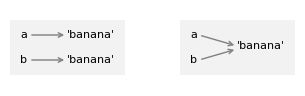

In [69]:
width, height, x, y = [2.85, 0.76, 0.17, 0.51]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

In the diagram on the left, `a` and `b` refer to two different objects that have the
same value. In the diagram on the right, they refer to the same object.
To check whether two variables refer to the same object, you can use the `is` operator.

In [70]:
a = 'banana'
b = 'banana'
a is b

True

In this example, Python only created one string object, and both `a`
and `b` refer to it.
But when you create two lists, you get two objects.

In [71]:
a = [1, 2, 3]
b = [1, 2, 3]
a is b

False

So the state diagram looks like this.

In [72]:
t = [1, 2, 3]
binding1 = Binding(Value('a'), Value(repr(t)))
binding2 = Binding(Value('b'), Value(repr(t)))
frame = Frame([binding1, binding2], dy=-0.25)

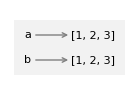

In [73]:
width, height, x, y = [1.16, 0.76, 0.21, 0.51]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y)
# adjust(x, y, bbox)

In this case we would say that the two lists are **equivalent**, because they have the same elements, but not **identical**, because they are not the same object. 
If two objects are identical, they are also equivalent, but if they are equivalent, they are not necessarily identical.

In [ ]:
### EXERCISE: Objects and Values
x = [10, 20, 30]
y = x
z = [10, 20, 30]
# 1. Check if x and y refer to the same object using "is"
# 2. Check if x and z have the same value using "=="
# 3. Check if x and z refer to the same object using "is"
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
x = [10, 20, 30]
y = x
z = [10, 20, 30]

same_object_xy = x is y
same_value_xz = x == z
same_object_xz = x is z

print(f"x is y: {same_object_xy}")  # True - same object (alias)
print(f"x == z: {same_value_xz}")   # True - same value (equivalent)
print(f"x is z: {same_object_xz}")  # False - different objects

### Aliasing

If `a` refers to an object and you assign `b = a`, then both variables refer to the same object.

In [74]:
a = [1, 2, 3]
b = a
b is a

True

So the state diagram looks like this.

In [75]:
t = [1, 2, 3]
binding1 = Binding(Value('a'), Value(repr(t)), dy=-0.11)
binding2 = Binding(Value('b'), draw_value=False, dy=0.11)
frame = Frame([binding1, binding2], dy=-0.25)

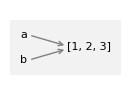

In [76]:
width, height, x, y = [1.11, 0.81, 0.17, 0.56]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y)
# adjust(x, y, bbox)

The association of a variable with an object is called a **reference**.
In this example, there are two references to the same object.

An object with more than one reference has more than one name, so we say the object is **aliased**.
If the aliased object is mutable, changes made with one name affect the other.
In this example, if we change the object `b` refers to, we are also changing the object `a` refers to.

In [77]:
b[0] = 5
a

[5, 2, 3]

So we would say that `a` "sees" this change.
Although this behavior can be useful, it is error-prone.
In general, it is safer to avoid aliasing when you are working with mutable objects.

For immutable objects like strings, aliasing is not as much of a problem.
In this example:

In [78]:
c = 'banana'
d = 'banana'

It almost never makes a difference whether `a` and `b` refer to the same
string or not.

In [ ]:
### EXERCISE: Aliasing
a = [1, 2, 3]
# 1. Create an alias b that points to the same list as a
# 2. Modify the list through b by changing the first element to 99
# 3. Create a true copy c using slicing
# 4. Modify c and observe that a remains unchanged
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
a = [1, 2, 3]
b = a  # alias
b[0] = 99

print(f"a after aliasing: {a}")
print(f"b: {b}")
print(f"Same object? {a is b}")

c = a[:]  # true copy
c[1] = 777

print(f"\na after copying: {a}")
print(f"c: {c}")
print(f"Same object? {a is c}")

### List Arguments in Functions

When you pass a list to a function, the function gets a reference to the
list. If the function modifies the list, the caller sees the change. For
example, `pop_first` uses the list method `pop` to remove the first element from a list.

In [79]:
def pop_first(lst):
    return lst.pop(0)

We can use it like this.

In [80]:
letters = ['a', 'b', 'c']
pop_first(letters)

'a'

The return value is the first element, which has been removed from the list -- as we can see by displaying the modified list.

In [81]:
letters

['b', 'c']

In this example, the parameter `lst` and the variable `letters` are aliases for the same object, so the state diagram looks like this:

In [82]:
lst = make_list('abc', dy=-0.3, offsetx=0.1)
binding1 = Binding(Value('letters'), draw_value=False)
frame1 = Frame([binding1], name='__main__', loc='left')

binding2 = Binding(Value('lst'), draw_value=False, dx=0.61, dy=0.35)
frame2 = Frame([binding2], name='pop_first', loc='left', offsetx=0.08)

stack = Stack([frame1, frame2], dx=-0.3, dy=-0.5)

[np.float64(2.05), np.float64(1.22), np.float64(1.06), np.float64(0.85)]

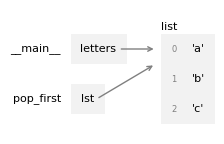

In [83]:
width, height, x, y = [2.04, 1.24, 1.06, 0.85]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = lst.draw(ax, x+0.5, y)
bbox = Bbox.union([bbox1, bbox2])
adjust(x, y, bbox)

Passing a reference to an object as an argument to a function creates a form of aliasing.
If the function modifies the object, those changes persist after the function is done.

In [ ]:
### EXERCISE: List Arguments in Functions
def add_item(lst, item):
    """Add item to list and return the list"""
    lst.append(item)
    return lst

# 1. Create a list with [1, 2, 3]
# 2. Call add_item with your list and the value 4
# 3. Print the original list to see if it changed
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
def add_item(lst, item):
    """Add item to list and return the list"""
    lst.append(item)
    return lst

my_list = [1, 2, 3]
print(f"Original list: {my_list}")

result = add_item(my_list, 4)
print(f"Returned list: {result}")
print(f"Original list after function call: {my_list}")
print(f"Same object? {result is my_list}")

## Practical Application

Let's apply what we've learned to a real-world task: building and searching a word list.

### Making a Word List

In the previous chapter, we read the file `words.txt` and searched for words with certain properties, like using the letter `e`.
But we read the entire file many times, which is not efficient.
It is better to read the file once and put the words in a list.
The following loop shows how.

In [84]:
download.download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

In [85]:
word_list = []

for line in open('words.txt'):
    word = line.strip()
    word_list.append(word)
    
len(word_list)

113783

Before the loop, `word_list` is initialized with an empty list.
Each time through the loop, the `append` method adds a word to the end.
When the loop is done, there are more than 113,000 words in the list.

Another way to do the same thing is to use `read` to read the entire file into a string.

In [86]:
string = open('words.txt').read()
len(string)

1016511

The result is a single string with more than a million characters.
We can use the `split` method to split it into a list of words.

In [87]:
word_list = string.split()
len(word_list)

113783

Evaluating the variable `word_list` in Jupyter Notebook will give you the whole list, which is very long, so let us use a for loop to take a look at the first 10 elements:

In [88]:
for i in range(10):
    print(word_list[i])

aa
aah
aahed
aahing
aahs
aal
aalii
aaliis
aals
aardvark


And we always want to know the data type of our data:

In [89]:
print(type(word_list))

<class 'list'>


Now, to check whether a string appears in the list, we can use the `in` operator.
For example, `'demotic'` is in the list.

In [90]:
'demotic' in word_list

True

But `'contrafibularities'` is not.

In [91]:
'contrafibularities' in word_list

False

And I have to say, I'm anaspeptic about it.

### The `all()` and `any()` Functions

Python provides two built-in functions for checking boolean conditions across list elements:

- **`all(iterable)`**: Returns `True` if all elements are truthy (or if the list is empty)
- **`any(iterable)`**: Returns `True` if at least one element is truthy

These are particularly useful when combined with list comprehensions or generator expressions.

In [94]:
# all() - check if all elements satisfy a condition
numbers = [2, 4, 6, 8, 10]

# Check if all numbers are even
all_even = all(num % 2 == 0 for num in numbers)
print(f"All numbers even? {all_even}")

# Check if all numbers are positive
all_positive = all(num > 0 for num in numbers)
print(f"All numbers positive? {all_positive}")

# With a list containing a negative number
mixed = [2, 4, -6, 8]
all_positive_mixed = all(num > 0 for num in mixed)
print(f"All mixed numbers positive? {all_positive_mixed}")

All numbers even? True
All numbers positive? True
All mixed numbers positive? False


In [95]:
# any() - check if at least one element satisfies a condition
numbers = [1, 3, 5, 7, 9]

# Check if any number is even
has_even = any(num % 2 == 0 for num in numbers)
print(f"Has any even number? {has_even}")

# Check if any number is greater than 5
has_large = any(num > 5 for num in numbers)
print(f"Has number > 5? {has_large}")

# Practical example: check if any word is longer than 10 characters
words = ['hello', 'world', 'programming', 'python']
has_long_word = any(len(word) > 10 for word in words)
print(f"Has word longer than 10 chars? {has_long_word}")

Has any even number? False
Has number > 5? True
Has word longer than 10 chars? True


**Common use cases:**
- Validation: `all(score >= 60 for score in scores)` - check if all students passed
- Search: `any(word.startswith('py') for word in words)` - check if any word starts with 'py'
- Data quality: `all(value is not None for value in data)` - check for missing data

**Note:** Both `all()` and `any()` use **short-circuit evaluation**—they stop as soon as the result is determined, making them efficient for large lists.

In [ ]:
### EXERCISE: all() and any() Functions
numbers = [2, 4, 6, 8, 9]
words = ['python', 'java', 'javascript', 'go']
# 1. Check if all numbers are even
# 2. Check if any word starts with 'j'
# 3. Check if any number is greater than 10
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
numbers = [2, 4, 6, 8, 9]
words = ['python', 'java', 'javascript', 'go']

all_even = all(num % 2 == 0 for num in numbers)
any_starts_j = any(word.startswith('j') for word in words)
any_gt_10 = any(num > 10 for num in numbers)

print(f"All numbers even: {all_even}")
print(f"Any word starts with 'j': {any_starts_j}")
print(f"Any number > 10: {any_gt_10}")

## Using Lists as Stacks and Queues

Lists can be used to implement two common data structures: **stacks** and **queues**.

#### Stacks (LIFO - Last In, First Out)

A stack follows the "last in, first out" principle. Think of a stack of plates—you add (push) and remove (pop) from the top.

Python lists work naturally as stacks using `append()` and `pop()`:

In [53]:
# Stack operations
stack = []

# Push elements onto the stack
stack.append('first')
stack.append('second')
stack.append('third')
print("Stack after pushes:", stack)

# Pop elements from the stack (removes and returns the last element)
item = stack.pop()
print(f"Popped: {item}")
print("Stack after pop:", stack)

# Peek at the top without removing
if stack:
    print(f"Top element: {stack[-1]}")

Stack after pushes: ['first', 'second', 'third']
Popped: third
Stack after pop: ['first', 'second']
Top element: second


**Common stack use cases:**
- Undo/redo functionality in applications
- Browser back button history
- Expression evaluation (e.g., parsing mathematical expressions)
- Function call tracking (call stack)

#### Queues (FIFO - First In, First Out)

A queue follows the "first in, first out" principle. Think of a line at a store—the first person in line is the first to be served.

While you *can* use lists for queues with `append()` and `pop(0)`, this is **inefficient** for large queues because `pop(0)` requires shifting all remaining elements.

**Simple list-based queue (okay for small queues):**

In [54]:
# Queue operations with a list (inefficient for large queues)
queue = []

# Enqueue (add to back)
queue.append('first')
queue.append('second')
queue.append('third')
print("Queue after enqueues:", queue)

# Dequeue (remove from front) - SLOW for large queues!
item = queue.pop(0)
print(f"Dequeued: {item}")
print("Queue after dequeue:", queue)

Queue after enqueues: ['first', 'second', 'third']
Dequeued: first
Queue after dequeue: ['second', 'third']


**Efficient queue using `collections.deque`:**

For production code or larger queues, use `collections.deque` (double-ended queue), which provides O(1) operations at both ends:

In [55]:
from collections import deque

# Create an efficient queue
queue = deque()

# Enqueue (add to back)
queue.append('first')
queue.append('second')
queue.append('third')
print("Queue:", list(queue))

# Dequeue (remove from front) - FAST!
item = queue.popleft()
print(f"Dequeued: {item}")
print("Queue:", list(queue))

# Can also add to front or remove from back
queue.appendleft('zero')
print("After appendleft:", list(queue))

Queue: ['first', 'second', 'third']
Dequeued: first
Queue: ['second', 'third']
After appendleft: ['zero', 'second', 'third']


**Common queue use cases:**
- Task scheduling and job queues
- Breadth-first search in algorithms
- Message processing systems
- Print job management

**Summary:**
- Use **regular lists** for stacks (append/pop)
- Use **`collections.deque`** for queues (append/popleft) for better performance

## Performance Considerations

Understanding the time complexity of list operations is crucial for writing efficient code, especially when working with large datasets.

### Time Complexity of List Operations

Here's a table showing the time complexity of common list operations:

| Operation | Example | Time Complexity | Notes |
|-----------|---------|-----------------|-------|
| Access by index | `lst[i]` | O(1) | Constant time |
| Append to end | `lst.append(x)` | O(1) amortized | Usually fast |
| Pop from end | `lst.pop()` | O(1) | Constant time |
| Insert at beginning | `lst.insert(0, x)` | O(n) | Must shift all elements |
| Pop from beginning | `lst.pop(0)` | O(n) | Must shift all elements |
| Insert at position | `lst.insert(i, x)` | O(n) | Must shift elements after i |
| Search | `x in lst` | O(n) | Must check each element |
| Get length | `len(lst)` | O(1) | Length is stored |
| Slice | `lst[i:j]` | O(j-i) | Creates new list |
| Extend | `lst.extend(other)` | O(k) | k = length of other |
| Sort | `lst.sort()` | O(n log n) | Timsort algorithm |
| Reverse | `lst.reverse()` | O(n) | In-place reversal |
| Copy | `lst.copy()` or `lst[:]` | O(n) | Creates new list |
| Count | `lst.count(x)` | O(n) | Must check each element |
| Index | `lst.index(x)` | O(n) | Searches sequentially |
| Remove | `lst.remove(x)` | O(n) | Search + shift elements |

In [ ]:
### EXERCISE: Time Complexity
data = list(range(1000))
# Which operation is faster and why?
# Option A: data[500]
# Option B: data.index(500)
# Write code to test both operations
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
import time
data = list(range(1000))

# Option A: Access by index - O(1)
start = time.time()
value_a = data[500]
time_a = time.time() - start

# Option B: Search with index() - O(n)
start = time.time()
value_b = data.index(500)
time_b = time.time() - start

print(f"Access by index [500]: {value_a} (faster - O(1))")
print(f"Search with index(500): {value_b} (slower - O(n))")
print(f"\nOption A is much faster because it's O(1) vs O(n)")

### Performance Tips

**1. Avoid repeated inserting/removing at the beginning**

In [132]:
# SLOW: Repeated insertions at beginning (O(n²) overall)
result = []
for item in range(1000):
    result.insert(0, item)  # Each insert is O(n)

# FAST: Append and reverse (O(n) overall)
result = []
for item in range(1000):
    result.append(item)  # Each append is O(1)
result.reverse()  # Reverse is O(n)

**2. Use list comprehensions for building lists**

In [133]:
# SLOWER: Using append in a loop
squares = []
for x in range(1000):
    squares.append(x ** 2)

# FASTER: List comprehension (optimized in CPython)
squares = [x ** 2 for x in range(1000)]

**3. Be aware of membership testing complexity**

In [135]:
# SLOW: Repeated membership tests in a list (O(n) per test)
seen = []  # Using a list
for item in range(1000):
    if item not in seen:  # O(n) search
        seen.append(item)

# FAST: Use a set for membership testing (O(1) per test)
seen = set()  # Using a set
for item in range(1000):
    if item not in seen:  # O(1) search
        seen.add(item)

**4. Memory Considerations**

Lists in Python are **dynamic arrays** that pre-allocate extra space for growth. When a list runs out of space during an append operation, Python allocates a new, larger array and copies all elements over.

**Key points:**
- Lists over-allocate to make repeated appends fast (amortized O(1))
- Each list object has overhead beyond just storing elements (~56 bytes base + 8 bytes per element on 64-bit Python)
- For memory-critical applications with large numeric datasets, consider NumPy arrays

**Rule of thumb:** Use lists for general-purpose sequential data. When performance becomes an issue:
1. Profile your code to find bottlenecks
2. Consider algorithmic improvements first
3. Then consider specialized data structures if needed

In [ ]:
### EXERCISE: Performance Tips
# Fix this slow code that repeatedly inserts at the beginning
result = []
for i in range(10):
    result.insert(0, i)  # Slow!
# Rewrite using append() and reverse() for better performance
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
# SLOW version (O(n²)):
result_slow = []
for i in range(10):
    result_slow.insert(0, i)

print(f"Slow result: {result_slow}")

# FAST version (O(n)):
result_fast = []
for i in range(10):
    result_fast.append(i)  # O(1) per operation
result_fast.reverse()      # O(n) once

print(f"Fast result: {result_fast}")
print("Both produce the same result, but fast version is O(n) vs O(n²)")

### When to Use Other Data Structures

While lists are versatile, other data structures may be more appropriate for specific use cases:

- **`set`**: When you need fast membership testing and don't care about order or duplicates
  - `x in my_set` is O(1) vs O(n) for lists
  
- **`dict`**: When you need key-value mappings with fast lookups
  - `my_dict[key]` is O(1) average case
  
- **`collections.deque`**: When you need efficient operations at both ends (queues)
  - `deque.popleft()` is O(1) vs O(n) for `list.pop(0)`
  
- **`array.array`**: When you need a homogeneous numeric array with less memory overhead
  - More memory-efficient for large numeric datasets
  
- **`tuple`**: When you need an immutable sequence
  - Slightly more memory-efficient than lists
  - Can be used as dictionary keys

In [ ]:
### EXERCISE: When to Use Other Data Structures
# You need to check if numbers are in a collection
# Compare using a list vs a set
import time

data = list(range(10000))
test_numbers = [5000, 7500, 9999]

# Your task: 
# 1. Test membership using a list
# 2. Test membership using a set
# 3. Compare the performance
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
import time

data_list = list(range(10000))
data_set = set(range(10000))
test_numbers = [5000, 7500, 9999]

# Test with list (O(n) per lookup)
start = time.time()
for num in test_numbers:
    _ = num in data_list
list_time = time.time() - start

# Test with set (O(1) per lookup)
start = time.time()
for num in test_numbers:
    _ = num in data_set
set_time = time.time() - start

print(f"List: {list_time:.6f}s (O(n))")
print(f"Set: {set_time:.6f}s (O(1))")
if set_time > 0:
    print(f"Set is {list_time/set_time:.1f}x faster!")
print("\nUse SET for fast membership testing!")